In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading data into dataframe
data = pd.read_csv("Admission_Predict.csv")


In [3]:
# first 5 instances of dataset
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
# last 5 instances of dataset
data.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [5]:
#Shape of dataframe
data.shape

(400, 9)

In [6]:
#columns in dataframe
data.columns


Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [7]:
# droping Id column
data.drop("Serial No.",axis=1,inplace=True)

In [8]:
# Checking Dataset
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [9]:
#Applying necessary function on "Chance of Admit"
data["Chance of Admit "]=data["Chance of Admit "].apply(lambda x: 1 if x>0.5 else 0)

In [10]:
# Checking Dataset
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,1
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,1
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,1
396,325,107,3,3.0,3.5,9.11,1,1
397,330,116,4,5.0,4.5,9.45,1,1
398,312,103,3,3.5,4.0,8.78,0,1


In [11]:
#Find missing values
print("Missing values:\n")
data.isnull().sum()

Missing values:



GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [12]:
# info about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 25.1 KB


In [13]:
#Correlation among dataset
data.corr()


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.390875
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.393121
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.279316
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.285939
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.353341
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.455949
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.216193
Chance of Admit,0.390875,0.393121,0.279316,0.285939,0.353341,0.455949,0.216193,1.000000


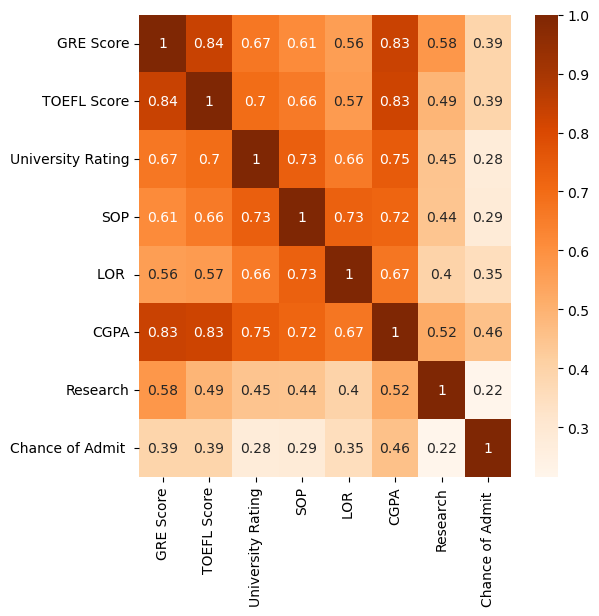

In [15]:

#Correlation heatmap
plt.figure(figsize=(6,6))
sns.heatmap(data.corr(), annot=True, cmap='Oranges')
plt.show()


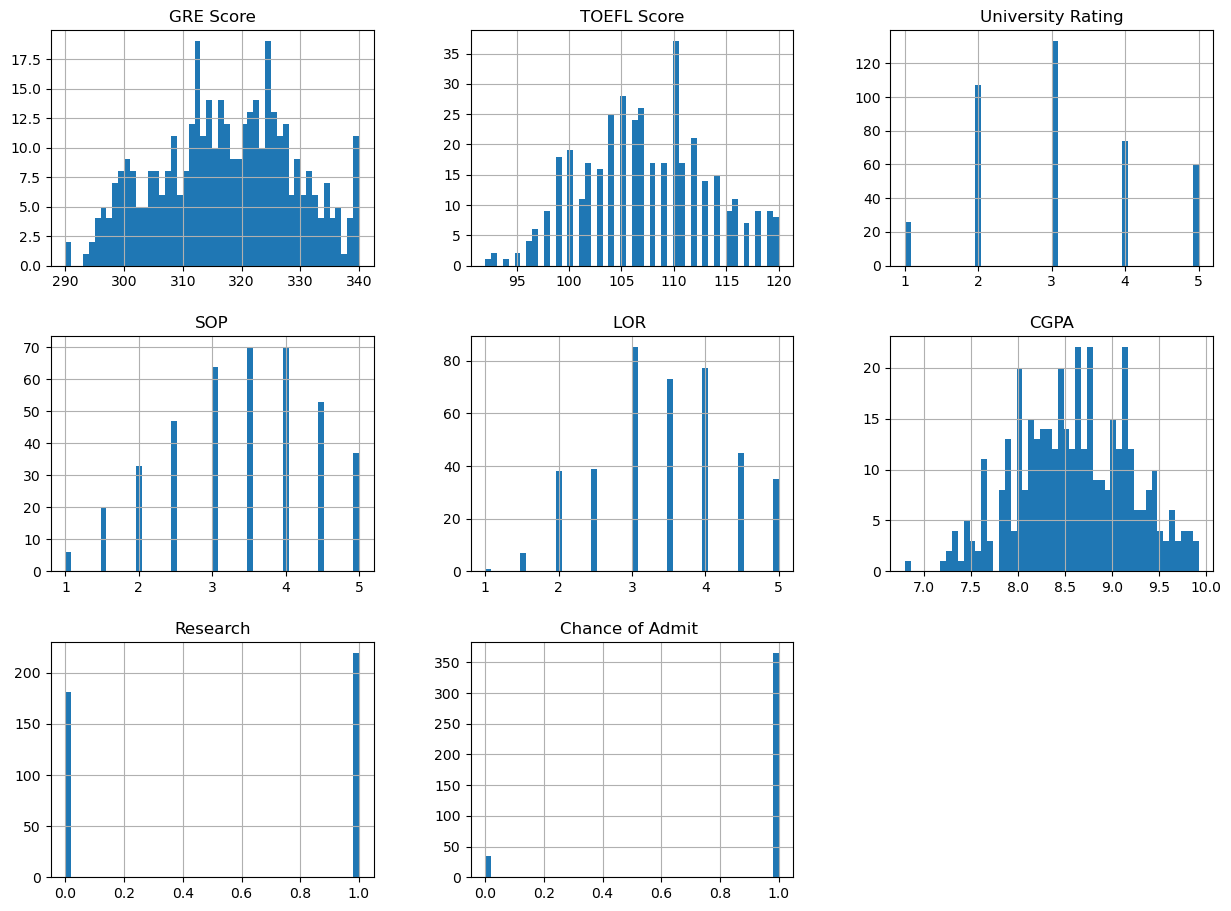

In [16]:
data.hist(bins = 50,figsize = (15,11));

In [17]:
# Calculating total Count
data_admit = data[data['Chance of Admit ']==1]
data_non_admit = data[data['Chance of Admit ']==0]
print("Admitted count : " ,data_admit.shape[0])
print("Non - Admitted count : " ,data_non_admit.shape[0])

Admitted count :  365
Non - Admitted count :  35


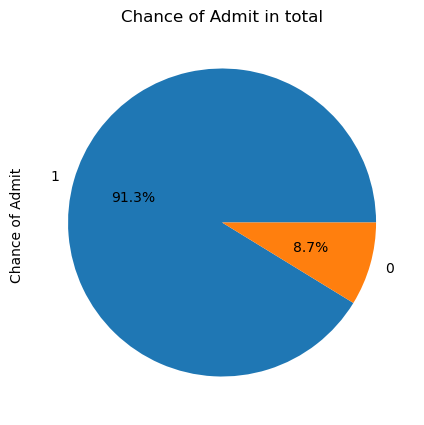

In [18]:
# pie chart for "Chance of Admit"
data['Chance of Admit '].value_counts().plot(kind='pie',figsize=(5,5),autopct=('%1.1f%%'))
plt.title("Chance of Admit in total")
plt.show()

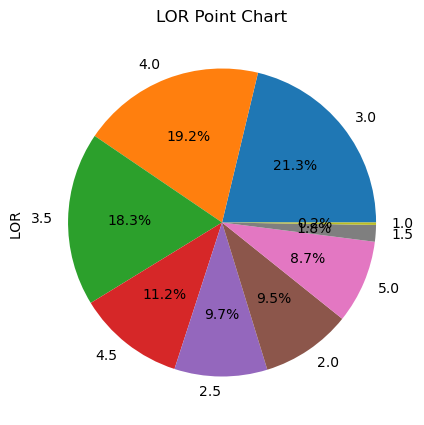

In [19]:
# pie chart for LOR
data['LOR '].value_counts().plot(kind='pie',figsize=(5,5),autopct='%1.1f%%')
plt.title("LOR Point Chart")
plt.show()

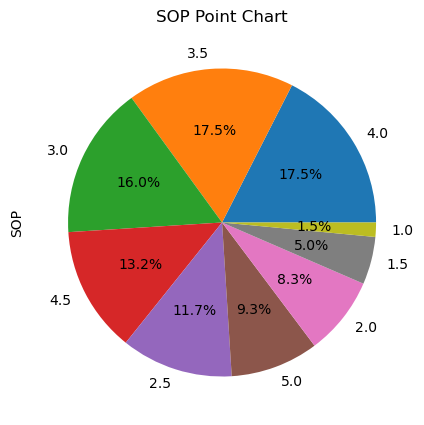

In [20]:
# pie chart for SOP
data['SOP'].value_counts().plot(kind='pie',figsize=(5,5),autopct='%1.1f%%')
plt.title("SOP Point Chart")
plt.show()


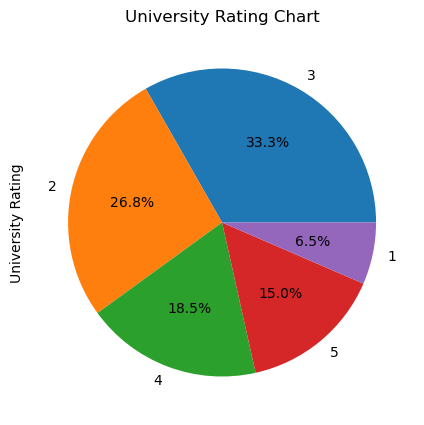

In [22]:
# pie chart for "University Rating"
data["University Rating"].value_counts().plot(kind='pie',figsize=(5,5),autopct='%1.1f%%')
plt.title("University Rating Chart")
plt.show()

In [23]:
#highest GRE score
print("maximum GRE Score : ",data['GRE Score'].max())
#lowest GRE score
print("minimum GRE Score : ",data['GRE Score'].min())

maximum GRE Score :  340
minimum GRE Score :  290


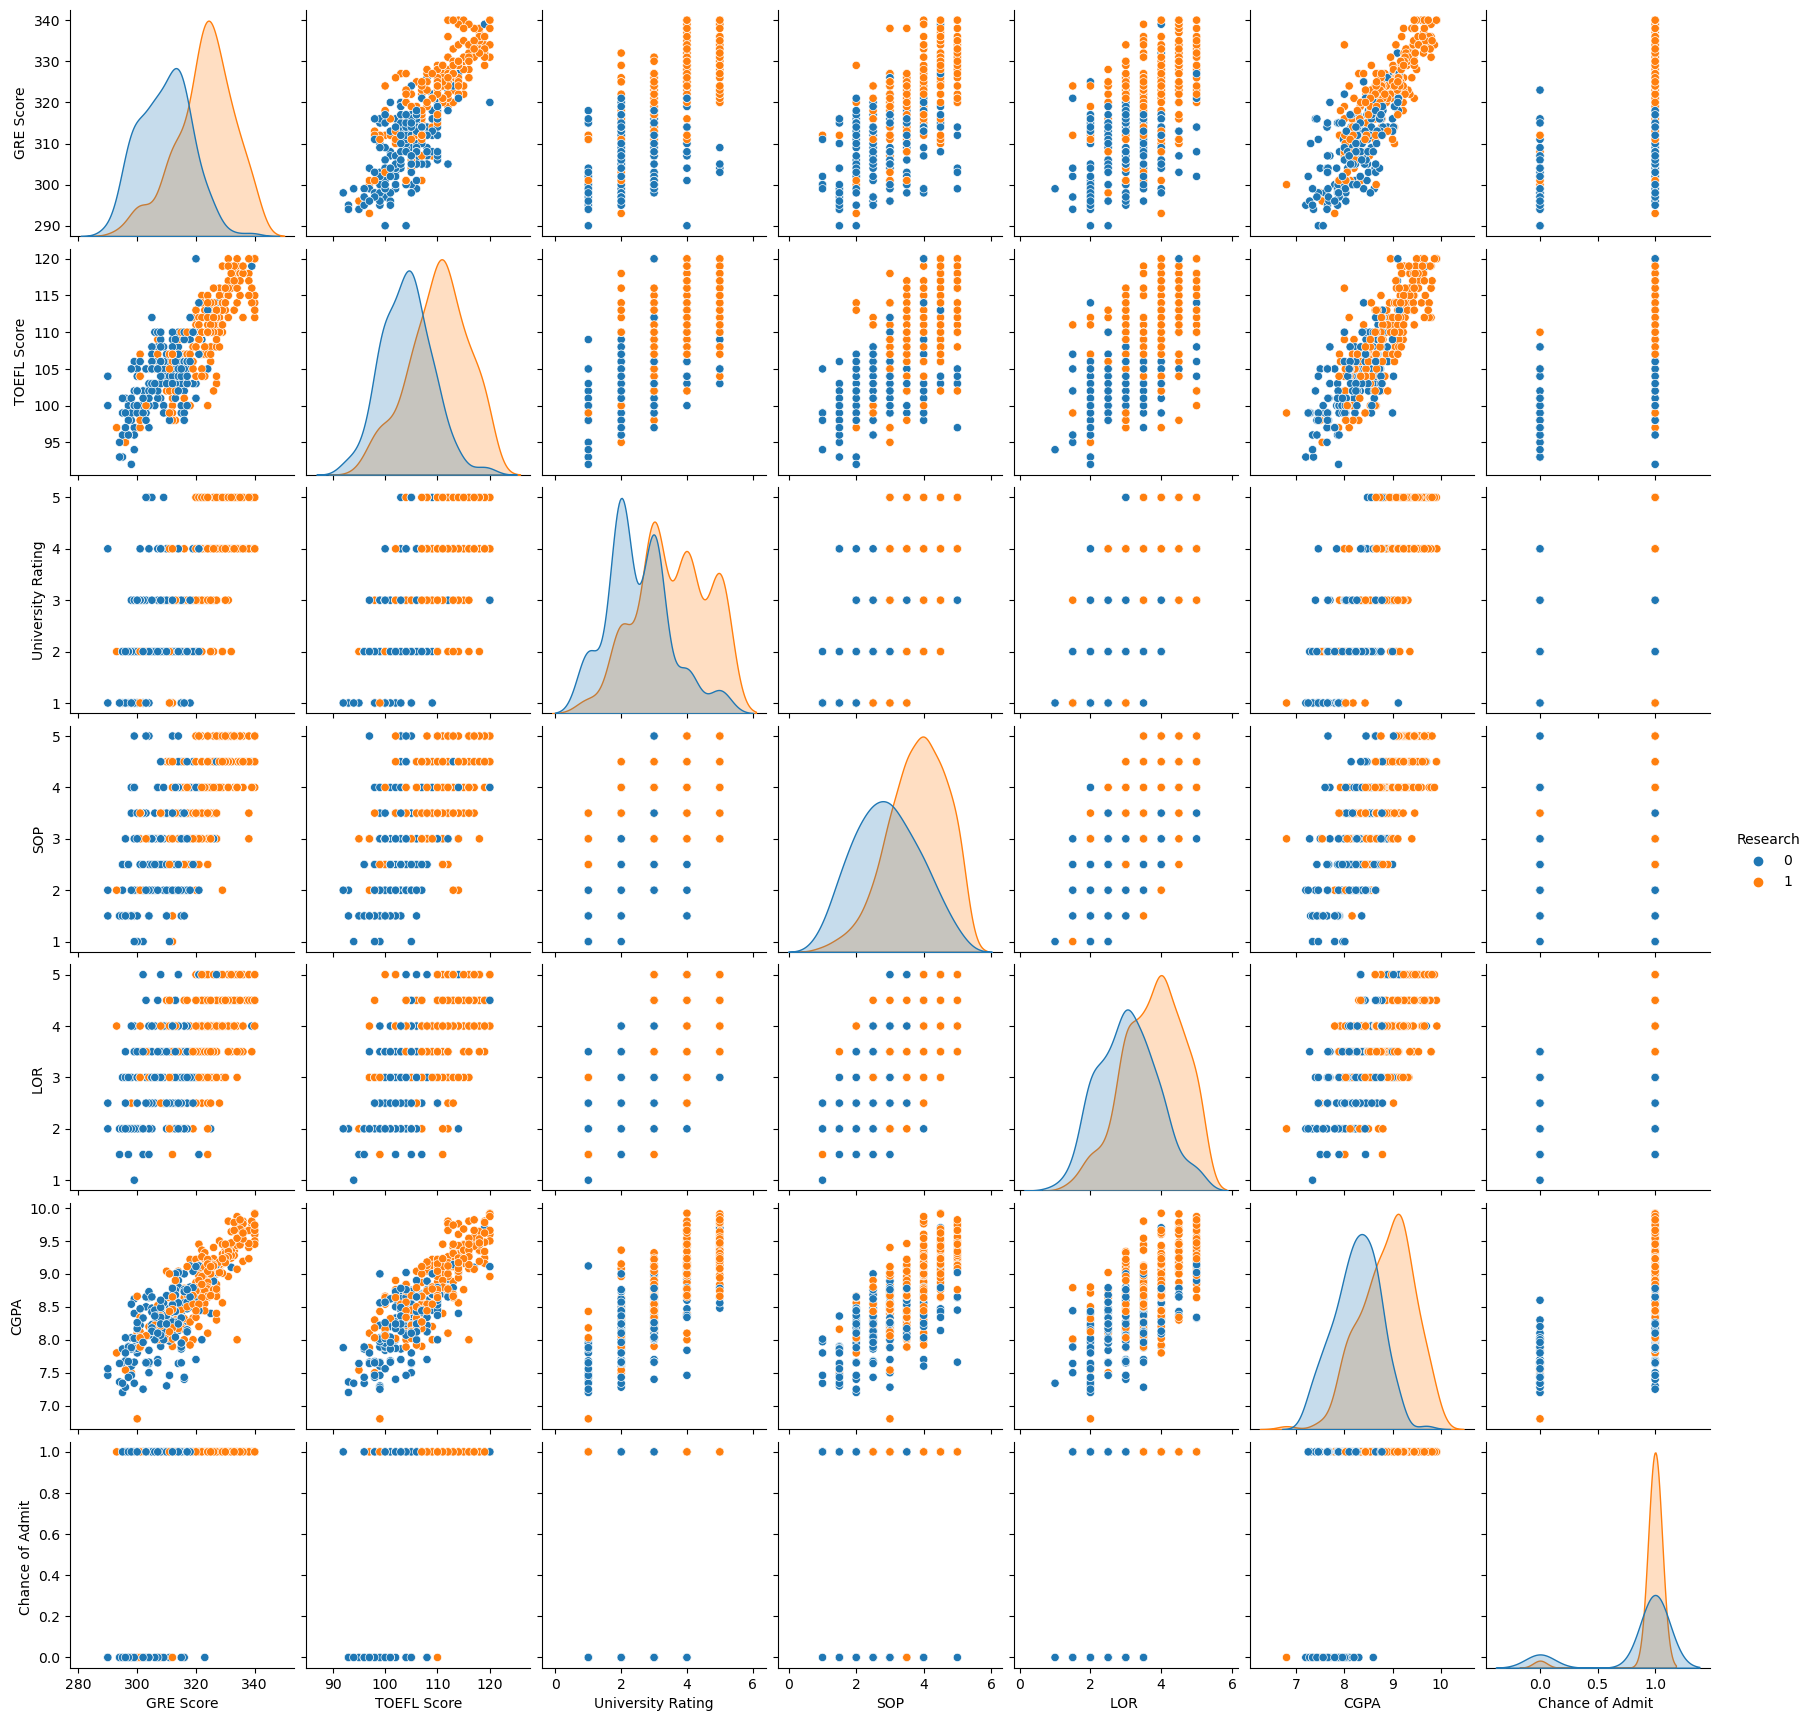

In [24]:
#pairplot based on hue = "Research"
sns.pairplot(data,hue = "Research")

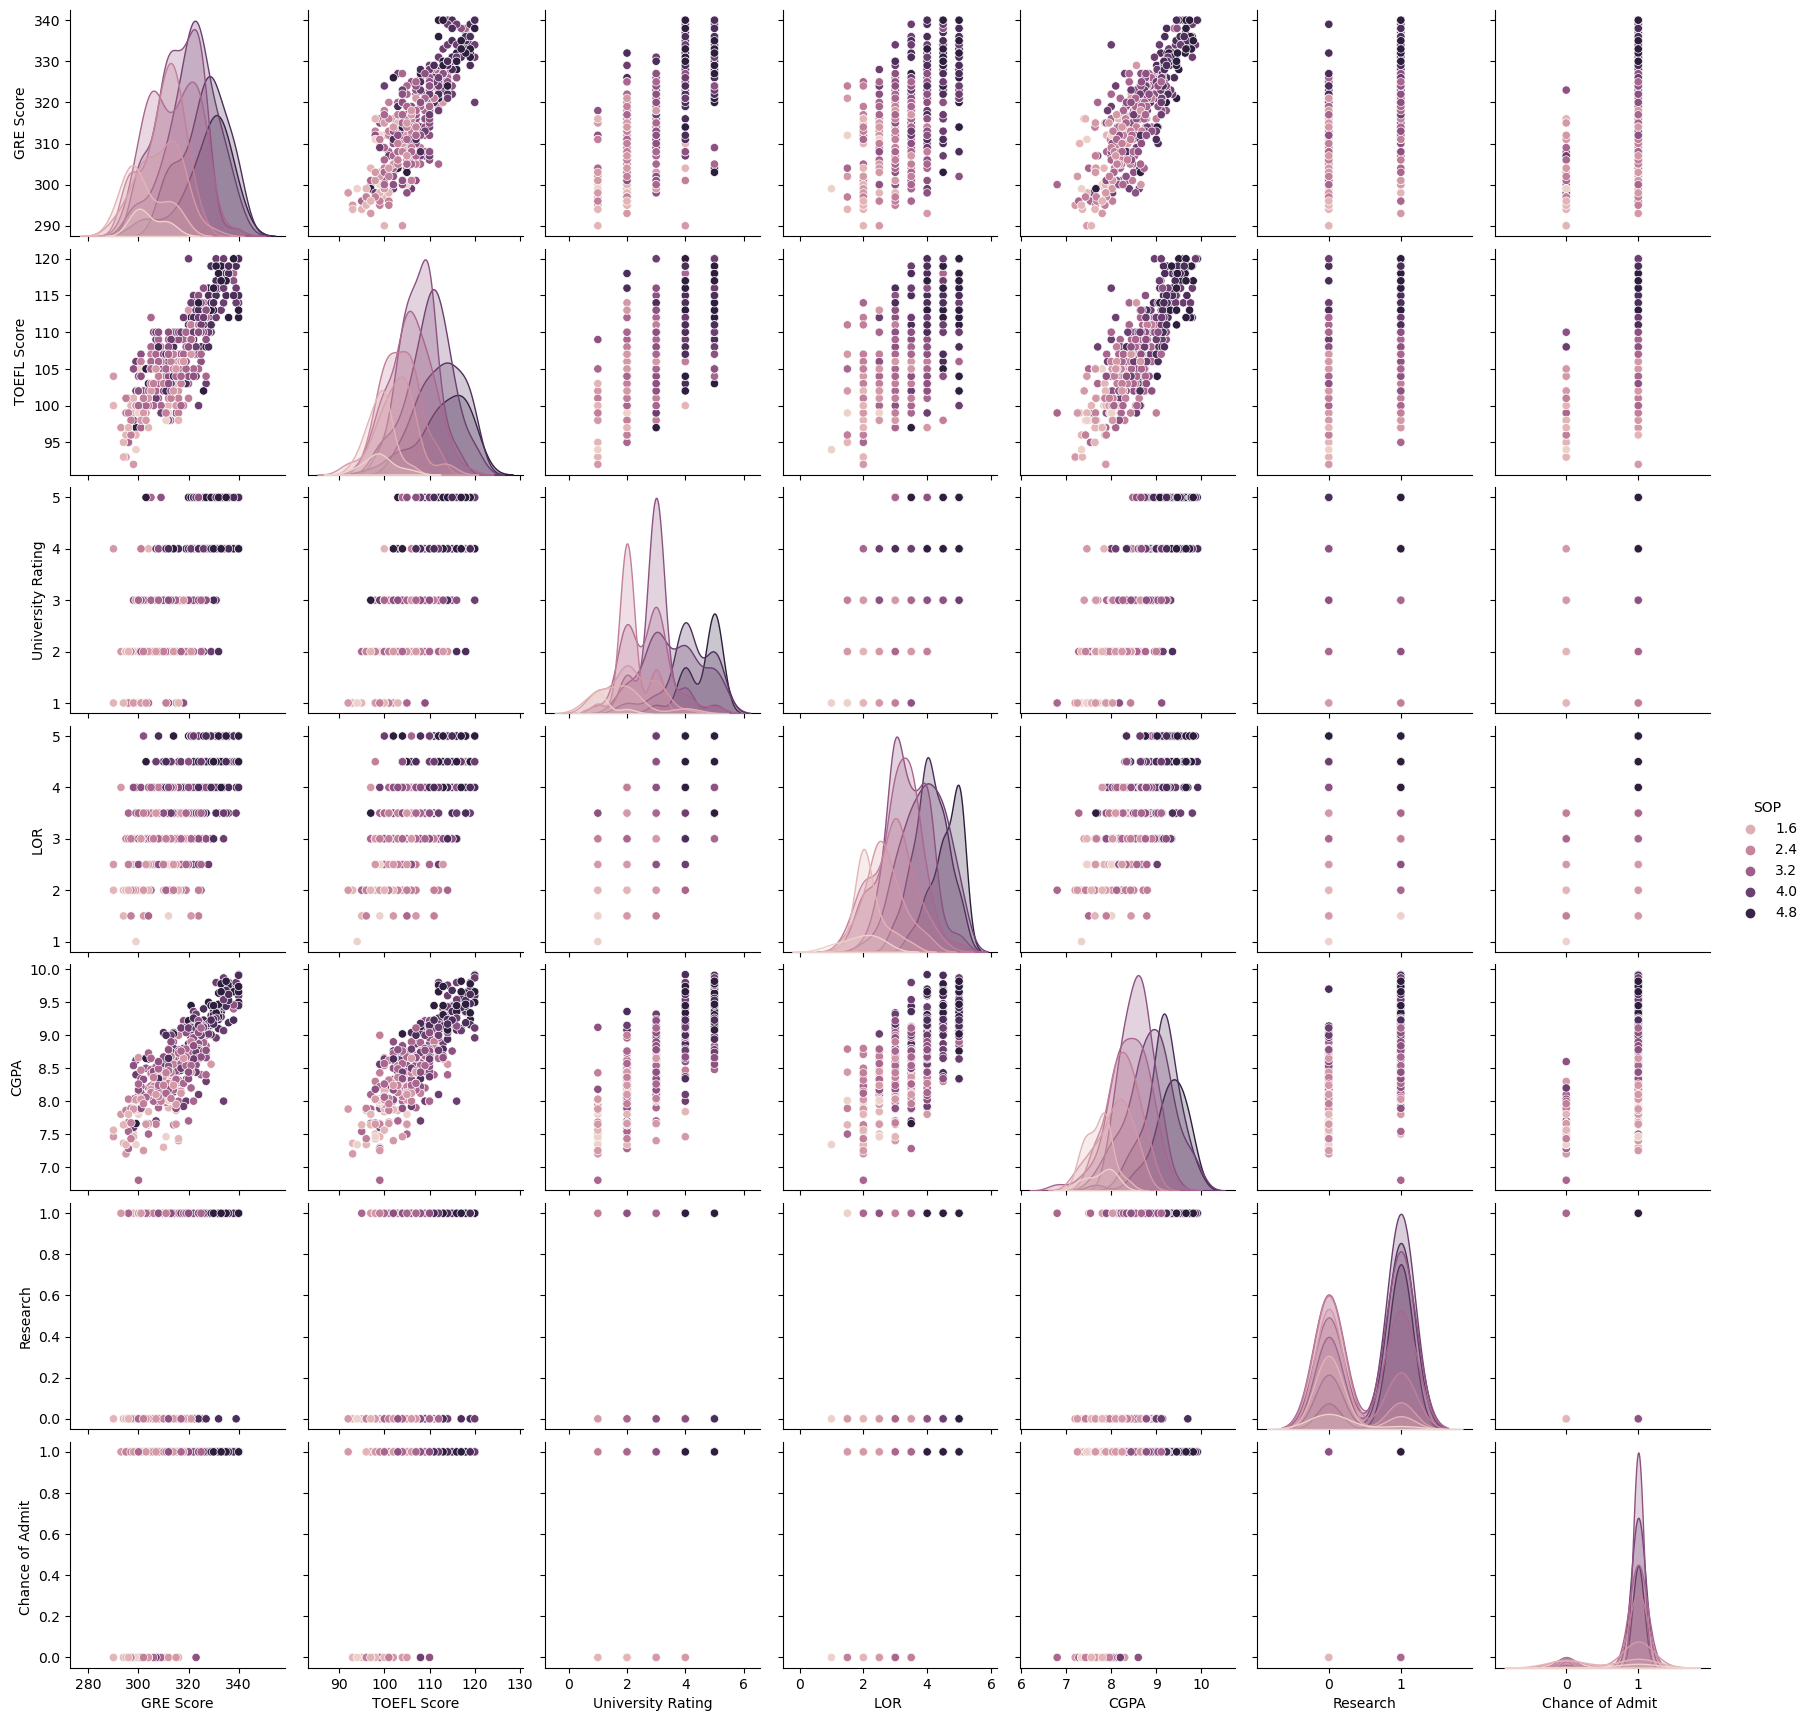

In [25]:
#pairplot based on hue = "SOP"
sns.pairplot(data,hue = "SOP");

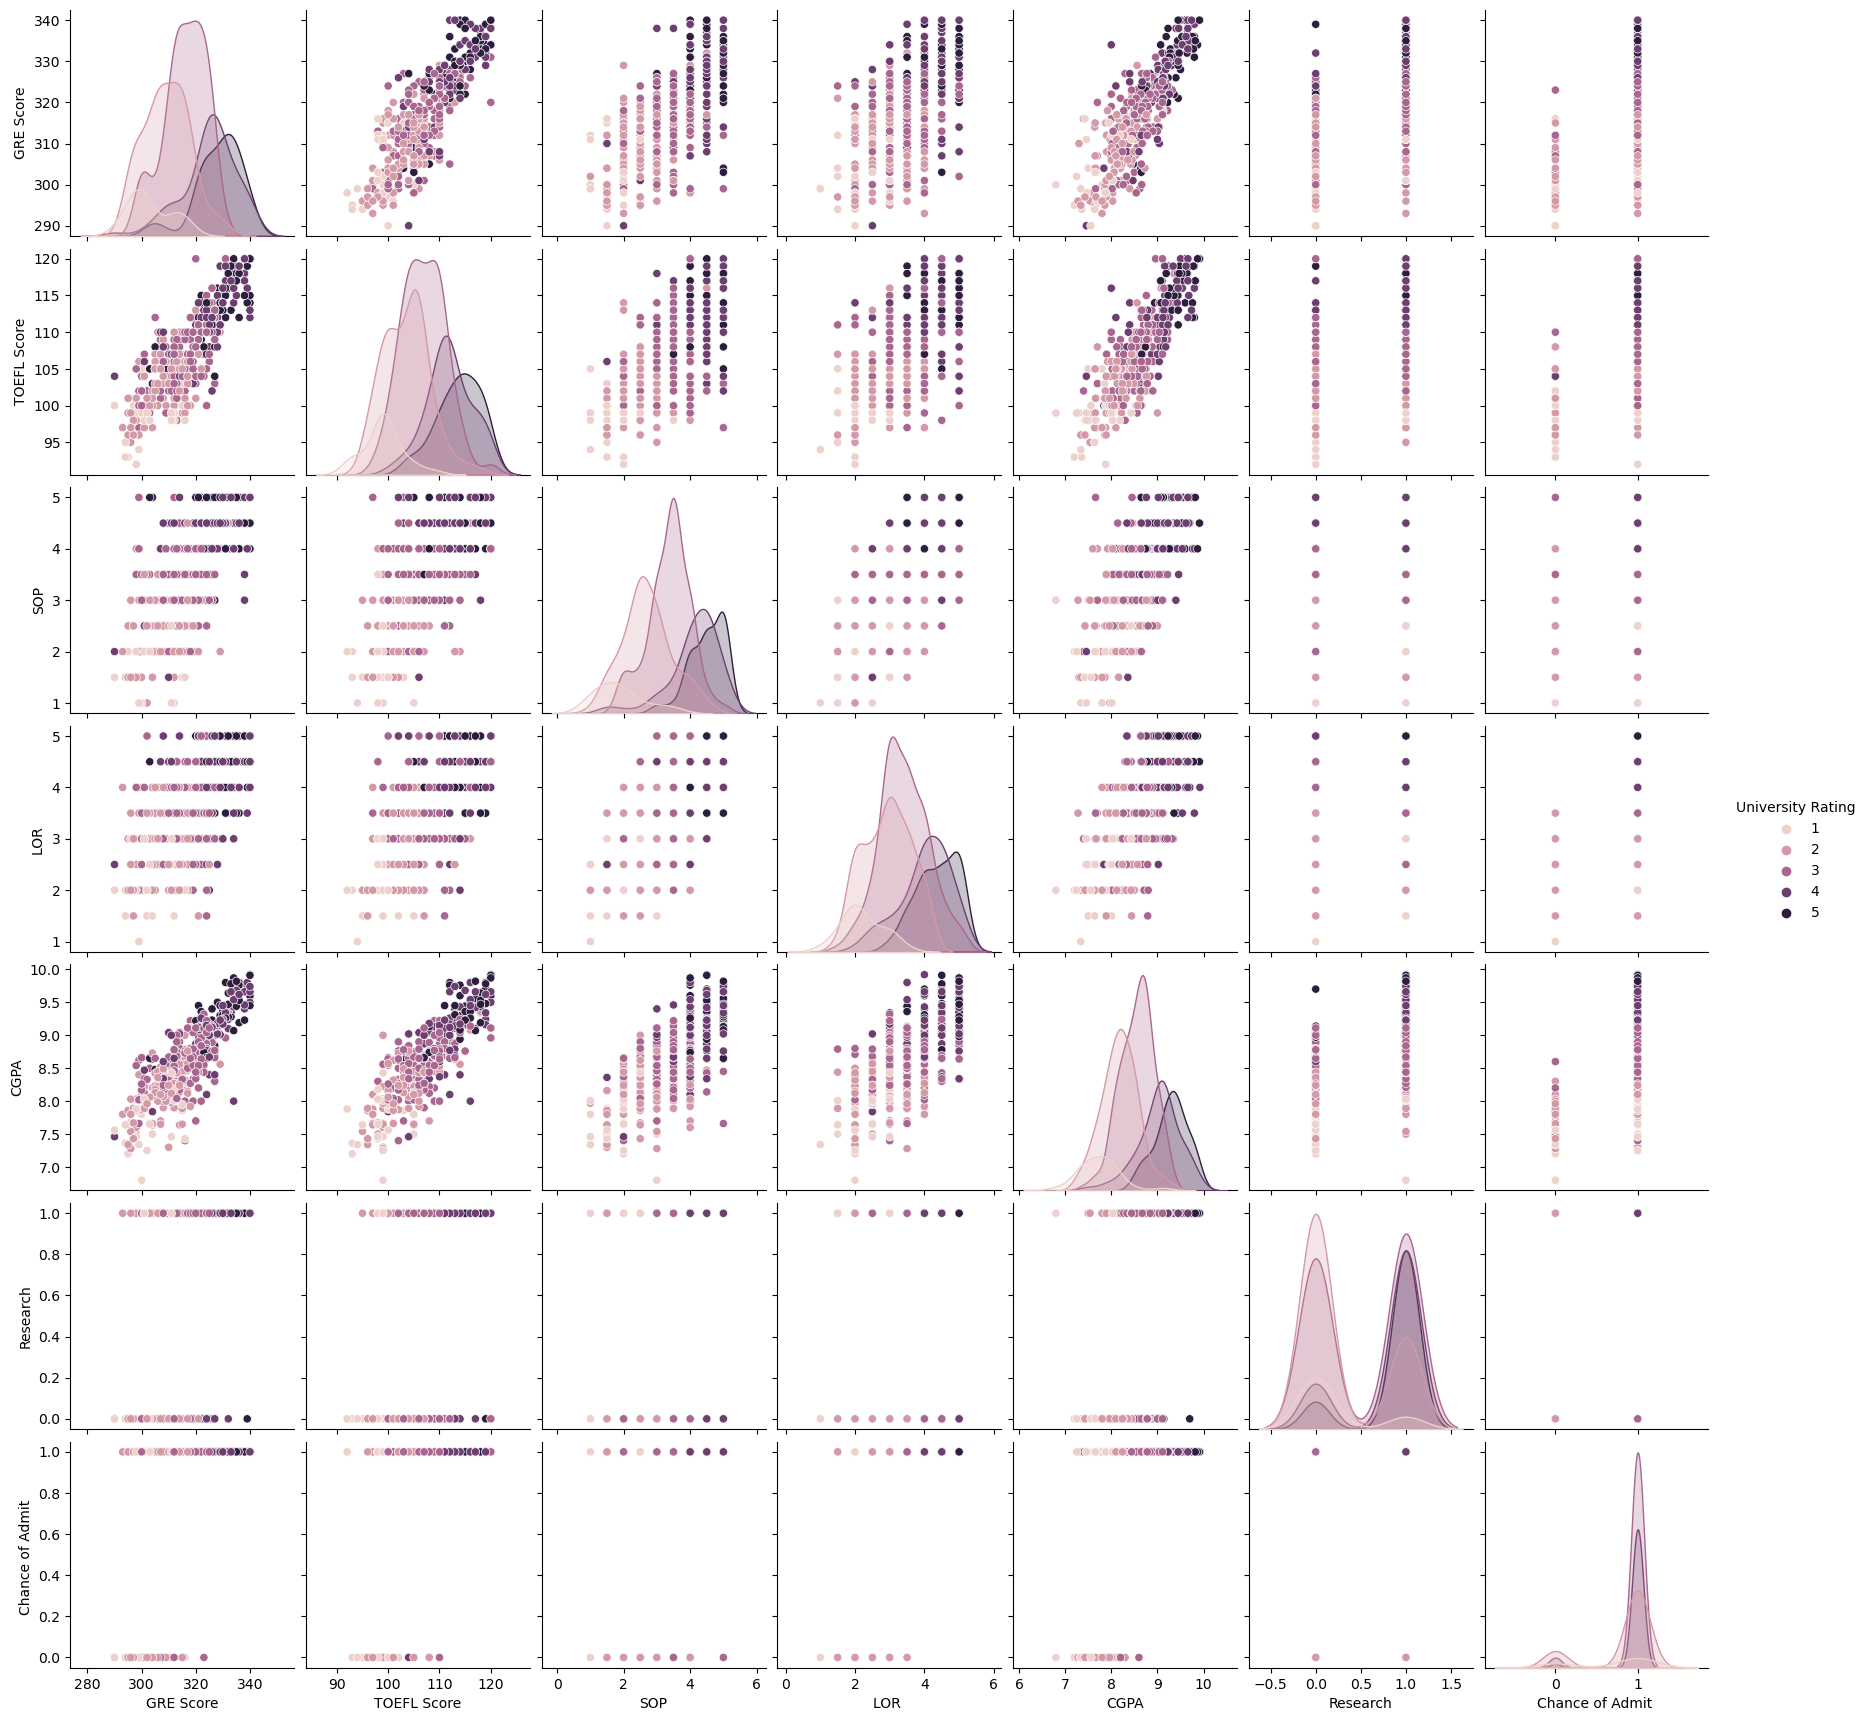

In [26]:
#pairplot based on hue = "University Rating"
sns.pairplot(data,hue = "University Rating");

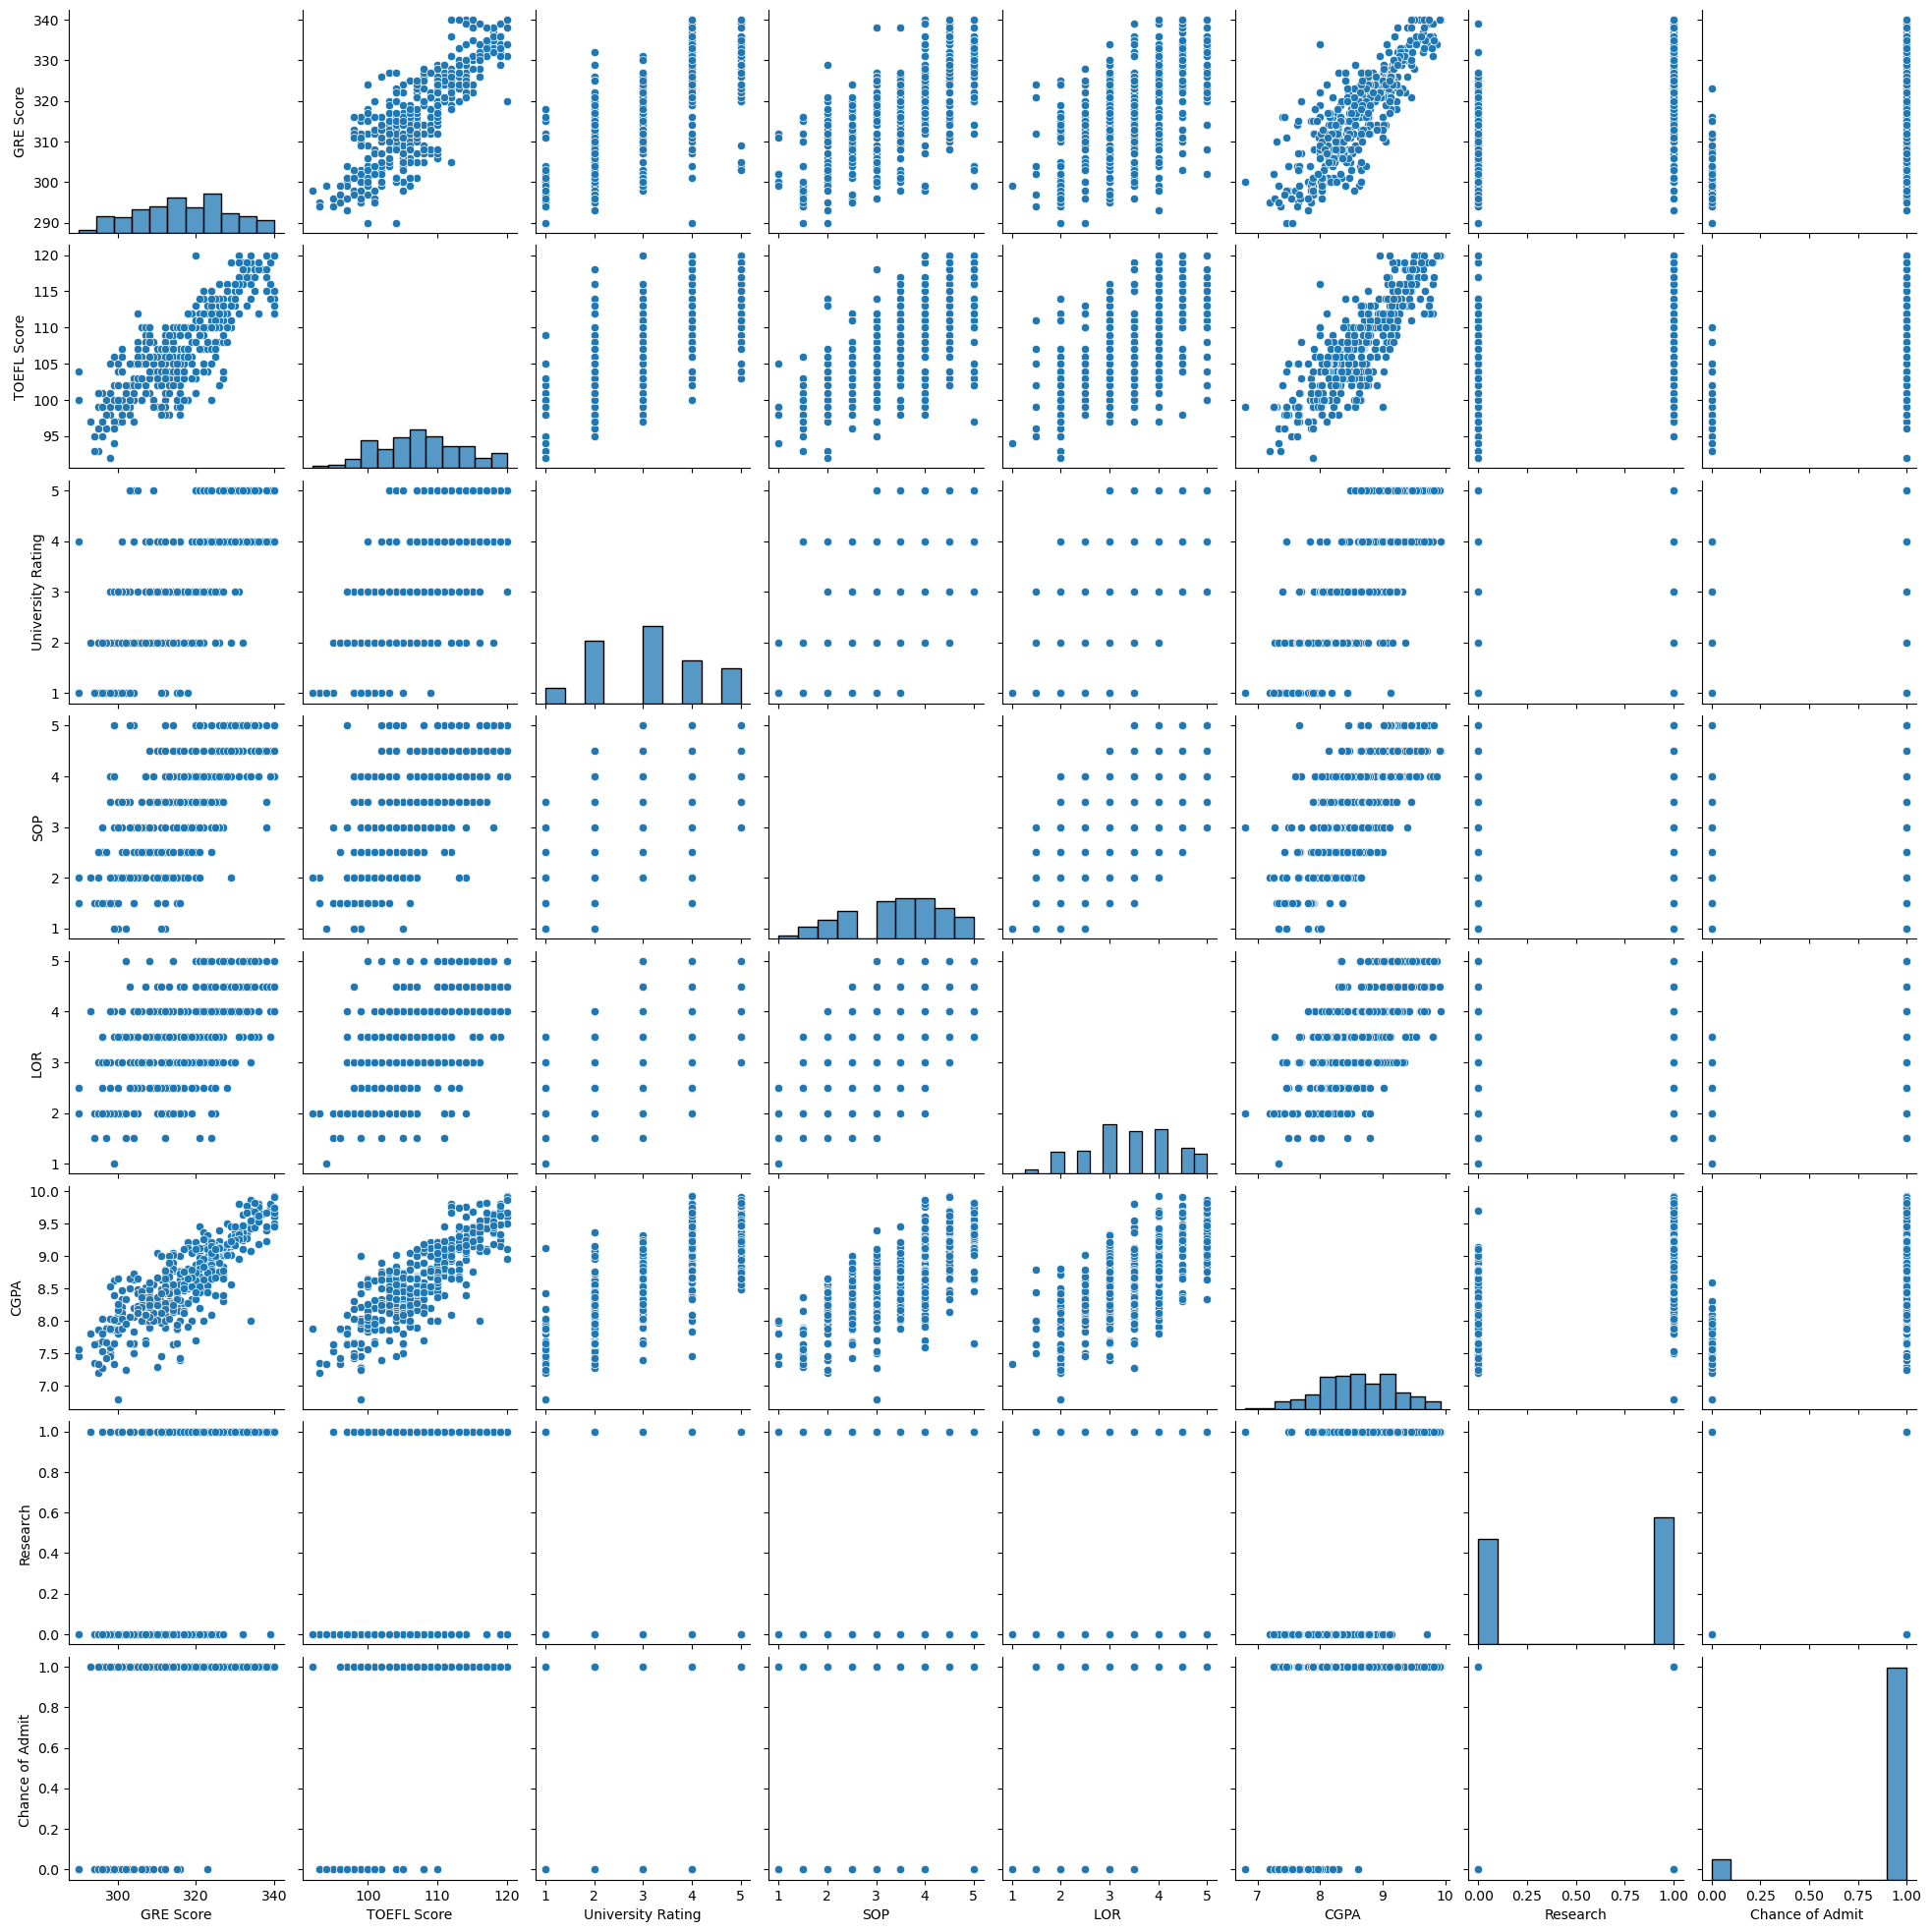

In [27]:
#pairplot for dataset
sns.pairplot(data)


In [28]:
# dependent and independent feature
X= data.drop("Chance of Admit ",axis =1 )
y= data["Chance of Admit "]

In [29]:
# unique in independent feature
X.nunique()


GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 168
Research               2
dtype: int64

In [32]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state=1,stratify=y)
# Shape of train Test Split
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(320, 7) (320,)
(80, 7) (80,)


In [33]:
# Decision Tree Classifier model
from sklearn.tree import DecisionTreeClassifier
# instantiate the model
tree = DecisionTreeClassifier()
# fit the model
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [34]:
#predicting the target value from the model for the samples
y_train_tree = tree.predict(X_train)
y_test_tree = tree.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)
print("Decision Tree : Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree : Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree : Accuracy on training Data: 1.000
Decision Tree : Accuracy on test Data: 0.912


In [36]:
from sklearn.metrics import classification_report
#computing the classification report of the model
print(classification_report(y_test, y_test_tree))


              precision    recall  f1-score   support

           0       0.50      0.29      0.36         7
           1       0.93      0.97      0.95        73

    accuracy                           0.91        80
   macro avg       0.72      0.63      0.66        80
weighted avg       0.90      0.91      0.90        80



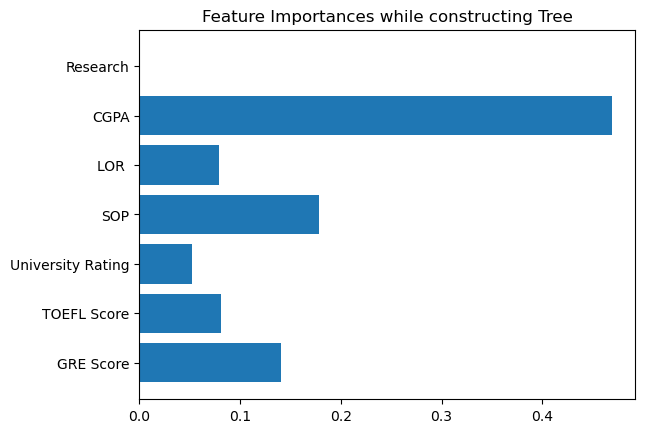

In [37]:
plt.barh(X.columns,tree.feature_importances_)
plt.title("Feature Importances while constructing Tree")
plt.show()

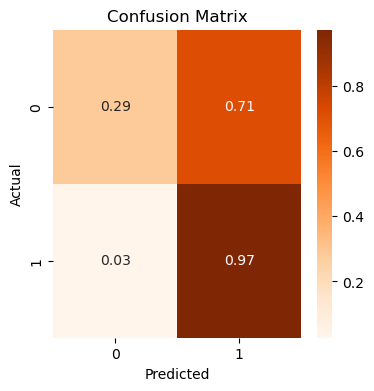

In [38]:
#visualization of Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_test_tree)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(cmn, annot=True, fmt='.2f',cmap='Oranges')
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False);


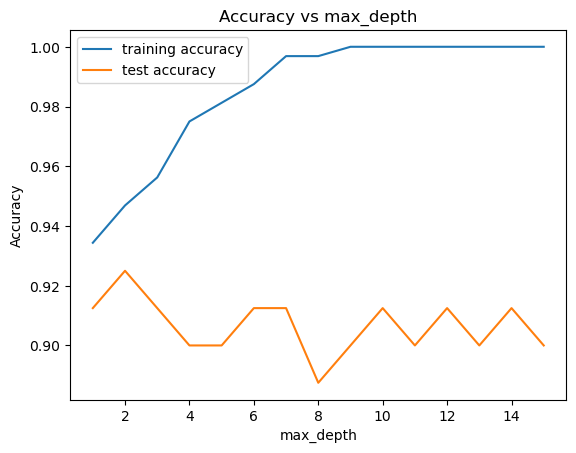

In [39]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 15
depth = range(1,16)
for n in depth:
 tree_test = DecisionTreeClassifier(max_depth=n)
 tree_test.fit(X_train, y_train)
 # record training set accuracy
 training_accuracy.append(tree_test.score(X_train, y_train))
 # record generalization accuracy
 test_accuracy.append(tree_test.score(X_test, y_test))

#plotting the training & testing accuracy for max_depth from 1 to 15
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.title("Accuracy vs max_depth")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend();

In [40]:
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeClassifier
# instantiate the model
tree = DecisionTreeClassifier(max_depth=3)
# fit the model
tree.fit(X_train, y_train)
text_representation = export_text(tree)
print(text_representation)

|--- feature_5 <= 7.85
|   |--- feature_4 <= 2.75
|   |   |--- feature_0 <= 299.50
|   |   |   |--- class: 0
|   |   |--- feature_0 >  299.50
|   |   |   |--- class: 0
|   |--- feature_4 >  2.75
|   |   |--- feature_4 <= 3.25
|   |   |   |--- class: 1
|   |   |--- feature_4 >  3.25
|   |   |   |--- class: 0
|--- feature_5 >  7.85
|   |--- feature_1 <= 98.50
|   |   |--- feature_3 <= 2.25
|   |   |   |--- class: 1
|   |   |--- feature_3 >  2.25
|   |   |   |--- class: 0
|   |--- feature_1 >  98.50
|   |   |--- feature_5 <= 8.11
|   |   |   |--- class: 1
|   |   |--- feature_5 >  8.11
|   |   |   |--- class: 1



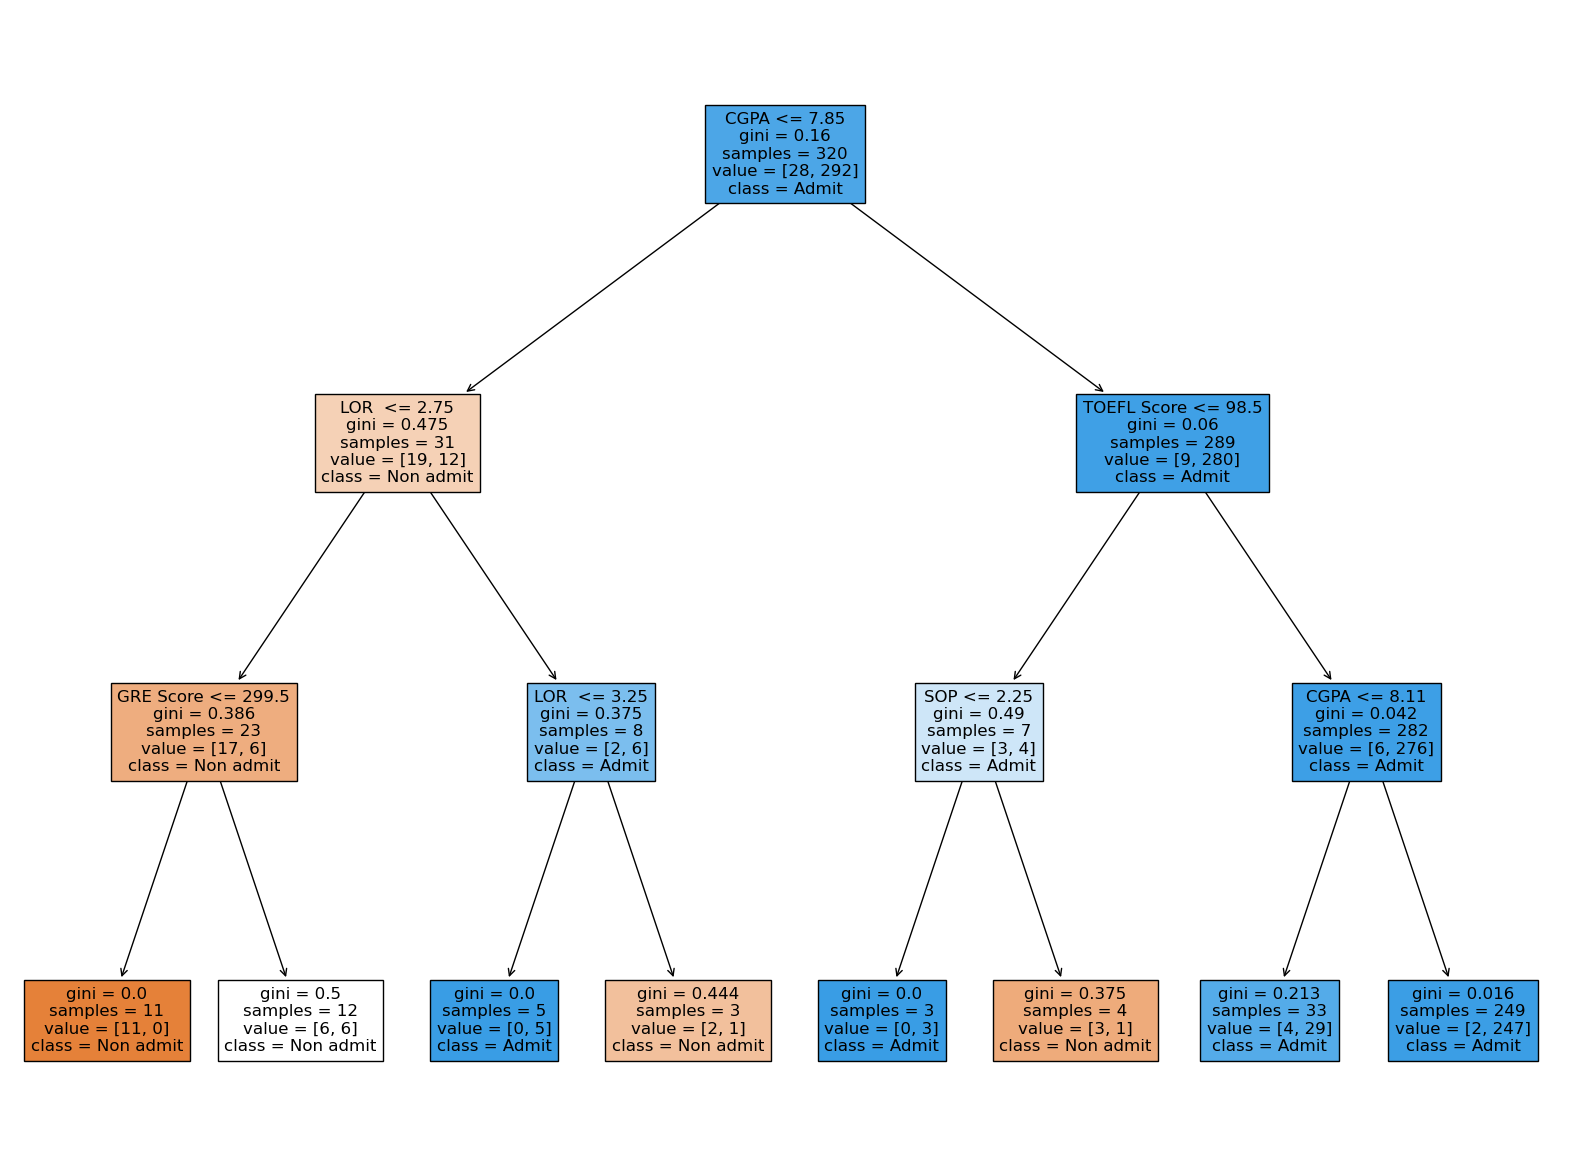

In [41]:
# visualiazation of tree
import sklearn.tree as tr
fig = plt.figure(figsize=(20,15))
_ = tr.plot_tree(tree,
 feature_names=X.columns,
 class_names=np.array(["Non admit","Admit"]),
 filled=True)